### Statistic for AI and Data Science: Coursework 2

#### 1 . Introducing the dataset

The dataset provides a record of bridge structures. It encompasses a range of information, including structure identifiers, district locations, detour lengths, toll information, maintainers, urban or rural settings, construction years, traffic conditions and structural specifications. Additionally, it denotes the historic significance of the structures and material compositions. 

This analysis of the Texas Bridge data involves exploring continuous and categorical variables and using regression modeling to assess predictor variables impact on a target variable.

## 2. Coursework Requirements

####  Part 2.1 Scenario

This report addresses the requirements for Coursework 2, which is based on Notebook 3 and uses Texas Bridge data. The objective of this analysis is to assess the predictability of bridge conditions by exploring various variables using regression modeling.

The goal is to draw preliminary conclusions and provide insights for the Texas Department of Transportation.

In [1]:
# Importing required libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

%matplotlib inline
%matplotlib inline

The Texas Department of Transportation seeks to understand how well specific variables can predict the current condition of bridges. The relevant variables include Age (derived from Year), Average Daily Use (AverageDaily), Percent of Trucks (Trucks_percent), Material (Materials), and Design (Designs). The analysis will leverage linear regression to fulfill this purpose.

### 2. Coursework Requirements

#### 2.1 Part 1: Data Preparation


The data is loaded from the CSV file.
To set the types of each variables, a type map is used. This avoids Pandas guessing the types eg non-numeric fields as strings.

I am representing them as categorical variables: 
- Type category gives the default behaviour (use each unique value as a category and categories are not ordered)
For ordinal variables (categorical variables with an order):
- Suitable type declared explicitly


In [2]:
# Importing csv file and saving to pd dataframe
# The code below declares a catageorical type with categories in a specified order
# This can be used for an ordinal variable
rating_type = pd.CategoricalDtype(
    categories=['Failed', 'Failing', 'Critical', 'Serious', 'Poor', 'Fair', 
                'Satisfactory', 'Good', 'Very Good', 'Excellent'], 
    ordered=True)


types_dict = { 'Structure_id': str, 'District':'category', 'Toll':'category', 
              'Maintainer':'category', 'Urban':'category', 'Status':'category', 
              'Historic':'category', 'Service_under':'category', 'Material':'category', 
              'Design':'category', 
              'Deck_rating':rating_type, 'Superstr_rating':rating_type, 'Substr_rating':rating_type} 

df = pd.read_csv('tx19_bridges_sample.csv', dtype = types_dict, index_col = 'Structure_id')
# df = pd.read_csv('tx19_bridges_sample.csv')
df


,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,2,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,1,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,1,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,14,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,1,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,300,...,3,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600
DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,300,...,1,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200,...,4,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500


Checked for empty columns, 
empty row in superstr rating and deck rating, predictor variables
removed entire rows as empty values will affect using to predict

In [3]:

df.isnull().sum()

District           0
Detour_Km          0
Toll               0
Maintainer         0
Urban              0
Status             0
Year               0
Lanes_on           0
Lanes_under        0
AverageDaily       0
Historic           0
Service_under      0
Material           0
Design             0
Spans              0
Length             0
Width              0
Deck_rating        5
Superstr_rating    2
Substr_rating      0
Rated_load         0
Trucks_percent     0
Scour_rating       0
Future_traffic     0
dtype: int64

In [4]:
# remove rows with empty predictor variable values
df = df.dropna()
# df[df['Deck_rating'].isnull()]
df.isnull().sum()

District           0
Detour_Km          0
Toll               0
Maintainer         0
Urban              0
Status             0
Year               0
Lanes_on           0
Lanes_under        0
AverageDaily       0
Historic           0
Service_under      0
Material           0
Design             0
Spans              0
Length             0
Width              0
Deck_rating        0
Superstr_rating    0
Substr_rating      0
Rated_load         0
Trucks_percent     0
Scour_rating       0
Future_traffic     0
dtype: int64

#### 2.1.1 Deriving the 'Age' Variable

Since an 'Age' variable not in dataframe, using 'Year' variable able to derive the value. This enables the use of the age of bridges as a predictor for their condition.

In [5]:
#current year-year = bridge age
df['Age'] = 2023 - df['Year']
# print(df['Age'].value_counts())


C:\Users\steph\AppData\Local\Temp\ipykernel_19900\1887216433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = 2023 - df['Year']


#### 2.1.2 Excluding Very Old Bridges

Old/Historic bridges are removed these bridges are considered outliers and may not provide relevant insights into the current condition of bridges.

In [6]:
#check of historic column
df['Historic'].value_counts()

Not historic    19908
Possible        13903
Register          417
Unknown            58
Name: Historic, dtype: int64

In [7]:
#if not historic show value count
df = df[df['Historic'] != 'Possible']
df['Historic'].value_counts()

Not historic    19908
Register          417
Unknown            58
Possible            0
Name: Historic, dtype: int64

Old bridges over 70 were excluded as they do not represent current conditions. The average lifespan of a bridge is approximately 50-70 years

In [8]:
min_age = 70
df = df[df['Age'] <= min_age]
df

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic,Age
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1,18
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1,18
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150,11
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200,19
000021580-00093,District2,3,Free,Agency,Rural,Local,2005,2,0,150,...,49.1,8.5,Very Good,Very Good,Very Good,49.9,4.0,Dry,200,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,300,...,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600,29
DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,300,...,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600,23
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200,...,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500,27


#### 2.1.3 Simplifying Material and Design Categories

Here the categories within the 'Material' and 'Design' variables are merged. The objective is to reduce the categories count to  to improve the quality of the analysis.

Looking at different options of Materials

In [9]:
df['Material'].value_counts()

Concrete    16086
Steel        3562
Timber        347
Other          39
Masonry         1
Name: Material, dtype: int64

Material categories merged to streamline analysis allowing for easier examination of it's influence on bridge conditions. 
Timber, Masonry are merged into 'Other' category as value count is small compared.

In [10]:
material_mapping = {'Concrete': 'Concrete',
                    'Steel': 'Steel',
                    'Timber': 'Other',   # Merge Timber into 'Other'
                    'Other': 'Other',   # 'Other' remains unchanged
                    'Masonry': 'Other'}  # Merge Masonry into 'Other' 

In [11]:
#make material column into materials note timber, masonry and other is merged to 'other'
df['Material'] = df['Material'].map(material_mapping) 


In [12]:
#check new value count
df['Material'].value_counts()

Concrete    16086
Steel        3562
Other         387
Name: Material, dtype: int64

Design categories merged to streamline analysis allowing for easier examination of it's influence on bridge conditions. 
Samre method used for material, applied to Design.

In [13]:
df['Design'].value_counts()

Beam          17829
Slab           1060
Other           996
Arch             78
Frame            38
Truss            21
Movable          10
Suspension        3
Name: Design, dtype: int64

In [14]:
design_mapping = {  'Beam': 'Beam',
                    'Slab': 'Slab',
                    'Arch': 'Other',   # Merge Arhc into 'Other'
                    'Other': 'Other',
                    'Frame': 'Other',   
                    'Truss': 'Other',  
                    'Movable': 'Other',
                    'Suspension': 'Other'} 

In [15]:
df['Design'] = df['Design'].map(design_mapping) 

In [16]:
#check new value count
df['Design'].value_counts()

Beam     17829
Other     1146
Slab      1060
Name: Design, dtype: int64

In [17]:
df.columns


Index(['District', 'Detour_Km', 'Toll', 'Maintainer', 'Urban', 'Status',
       'Year', 'Lanes_on', 'Lanes_under', 'AverageDaily', 'Historic',
       'Service_under', 'Material', 'Design', 'Spans', 'Length', 'Width',
       'Deck_rating', 'Superstr_rating', 'Substr_rating', 'Rated_load',
       'Trucks_percent', 'Scour_rating', 'Future_traffic', 'Age'],
      dtype='object')

In [18]:
# create new dataframe (df2)using df

df2 = df[['District', 'Detour_Km', 'Age',
           'AverageDaily', 'Historic','Material', 'Design', 
       'Deck_rating', 'Superstr_rating', 'Substr_rating',
           'Trucks_percent']]
df2

,District,Detour_Km,Age,AverageDaily,Historic,Material,Design,Deck_rating,Superstr_rating,Substr_rating,Trucks_percent
Structure_id,,,,,,,,,,,
000021521-00101,District2,199,18,1,Not historic,Concrete,Slab,Good,Very Good,Very Good,0.0
000021521-00181,District2,199,18,1,Not historic,Concrete,Slab,Good,Good,Very Good,0.0
000021521-TMP20,District2,199,11,100,Not historic,Concrete,Beam,Very Good,Very Good,Very Good,0.0
000021580-00092,District2,6,19,150,Not historic,Concrete,Beam,Good,Very Good,Very Good,4.0
000021580-00093,District2,3,18,150,Not historic,Concrete,Beam,Very Good,Very Good,Very Good,4.0
...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,29,300,Not historic,Concrete,Beam,Good,Good,Good,40.0
DAPFORHOO000013,District9,0,23,300,Not historic,Concrete,Beam,Good,Good,Good,40.0
DAPFORHOO000015,District9,0,27,1200,Not historic,Concrete,Beam,Good,Good,Good,25.0


In [19]:
df2.columns

Index(['District', 'Detour_Km', 'Age', 'AverageDaily', 'Historic', 'Material',
       'Design', 'Deck_rating', 'Superstr_rating', 'Substr_rating',
       'Trucks_percent'],
      dtype='object')

Current condition: using 
Deck and Superstr and Substr Rating Integer Scoring
- 0 Failed 
- 1 Failing
- 2 Critical 
- 3 Serious  
- 4 Poor     
- 5 Fair
- 6 Satisfactory 
- 7 Good
- 8 Very Good
- 9 Excellent

In [20]:
df2['Deck_rating'].value_counts()

Good            13687
Very Good        3429
Satisfactory     2432
Fair              252
Excellent         207
Poor               22
Failed              5
Serious             1
Failing             0
Critical            0
Name: Deck_rating, dtype: int64

In [21]:
df2['Superstr_rating'].value_counts()

Good            9053
Very Good       7233
Satisfactory    3037
Excellent        347
Fair             323
Poor              32
Failed             5
Serious            5
Failing            0
Critical           0
Name: Superstr_rating, dtype: int64

In [22]:
df2['Substr_rating'].value_counts()

Good            12338
Satisfactory     4074
Very Good        2612
Fair              682
Excellent         153
Poor              140
Serious            20
Critical           10
Failed              5
Failing             1
Name: Substr_rating, dtype: int64

In [23]:
#created discrete variables to match the scoring system
condition_mapping = {'Failed': 0,
                     'Failing':1,
                     'Critical':2,
                    'Serious': 3,
                    'Poor': 4,
                    'Fair': 5,
                    'Satisfactory': 6,
                    'Good': 7,
                    'Very Good': 8, 
                    'Excellent': 9}

In [24]:
#created copy of file due to changes to material and design columns
df2 = df2.copy()

In [25]:
df2['Deck_rating']=df2['Deck_rating'].replace(condition_mapping)
df2['Superstr_rating']=df2['Superstr_rating'].replace(condition_mapping)
df2['Substr_rating']=df2['Substr_rating'].replace(condition_mapping)


In [26]:
df2

,District,Detour_Km,Age,AverageDaily,Historic,Material,Design,Deck_rating,Superstr_rating,Substr_rating,Trucks_percent
Structure_id,,,,,,,,,,,
000021521-00101,District2,199,18,1,Not historic,Concrete,Slab,7,8,8,0.0
000021521-00181,District2,199,18,1,Not historic,Concrete,Slab,7,7,8,0.0
000021521-TMP20,District2,199,11,100,Not historic,Concrete,Beam,8,8,8,0.0
000021580-00092,District2,6,19,150,Not historic,Concrete,Beam,7,8,8,4.0
000021580-00093,District2,3,18,150,Not historic,Concrete,Beam,8,8,8,4.0
...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,29,300,Not historic,Concrete,Beam,7,7,7,40.0
DAPFORHOO000013,District9,0,23,300,Not historic,Concrete,Beam,7,7,7,40.0
DAPFORHOO000015,District9,0,27,1200,Not historic,Concrete,Beam,7,7,7,25.0


#### 2.1.4 Deriving 'Current_Condition'

In this subsection the 'Current_Condition' is derived from the combined score of the 'Deck_rating', 'Superstr_rating' & 'Substr_rating'. This forms the base for the regression analysis needs later in the notebook.

In [27]:
#sum of all 3 scoring systems to 'current conditions' coloumn

df2['Deck_rating'] = df2['Deck_rating'].astype(float)
df2['Superstr_rating'] = df2['Superstr_rating'].astype(float)
df2['Substr_rating'] = df2['Substr_rating'].astype(float)

df2['Current_Condition'] = df2['Deck_rating'] + df2['Superstr_rating'] + df2['Substr_rating']

In [28]:
df2.columns

Index(['District', 'Detour_Km', 'Age', 'AverageDaily', 'Historic', 'Material',
       'Design', 'Deck_rating', 'Superstr_rating', 'Substr_rating',
       'Trucks_percent', 'Current_Condition'],
      dtype='object')

In [29]:
df2=df2[['District', 'Detour_Km', 'Age', 'AverageDaily',
       'Historic', 'Material', 'Design', 'Deck_rating', 'Superstr_rating',
       'Substr_rating','Current_Condition', 'Trucks_percent']]

In [30]:
#look at df 
df2

,District,Detour_Km,Age,AverageDaily,Historic,Material,Design,Deck_rating,Superstr_rating,Substr_rating,Current_Condition,Trucks_percent
Structure_id,,,,,,,,,,,,
000021521-00101,District2,199,18,1,Not historic,Concrete,Slab,7.0,8.0,8.0,23.0,0.0
000021521-00181,District2,199,18,1,Not historic,Concrete,Slab,7.0,7.0,8.0,22.0,0.0
000021521-TMP20,District2,199,11,100,Not historic,Concrete,Beam,8.0,8.0,8.0,24.0,0.0
000021580-00092,District2,6,19,150,Not historic,Concrete,Beam,7.0,8.0,8.0,23.0,4.0
000021580-00093,District2,3,18,150,Not historic,Concrete,Beam,8.0,8.0,8.0,24.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,29,300,Not historic,Concrete,Beam,7.0,7.0,7.0,21.0,40.0
DAPFORHOO000013,District9,0,23,300,Not historic,Concrete,Beam,7.0,7.0,7.0,21.0,40.0
DAPFORHOO000015,District9,0,27,1200,Not historic,Concrete,Beam,7.0,7.0,7.0,21.0,25.0


#### 2.2 Part 2: Exploratory Analysis

This part focuses on exploring the relationships between predictor variables and the target variable. 

-continuous predictors are age, average daily, trucks percent

-categorical predictors are materials and design

-target current condition continuous


#### 2.2.1 Visualising Variable Relationships

We use a scatter matrix to examine the connections among all  the numeric variables, shedding light on potential correlations.The scatter matrix displays a grid of scatter plots and bar charts each showing how all the variables could interact with eachother. 

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='AverageDaily', ylabel='Age'>,
        <Axes: xlabel='Current_Condition', ylabel='Age'>,
        <Axes: xlabel='Trucks_percent', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='AverageDaily'>,
        <Axes: xlabel='AverageDaily', ylabel='AverageDaily'>,
        <Axes: xlabel='Current_Condition', ylabel='AverageDaily'>,
        <Axes: xlabel='Trucks_percent', ylabel='AverageDaily'>],
       [<Axes: xlabel='Age', ylabel='Current_Condition'>,
        <Axes: xlabel='AverageDaily', ylabel='Current_Condition'>,
        <Axes: xlabel='Current_Condition', ylabel='Current_Condition'>,
        <Axes: xlabel='Trucks_percent', ylabel='Current_Condition'>],
       [<Axes: xlabel='Age', ylabel='Trucks_percent'>,
        <Axes: xlabel='AverageDaily', ylabel='Trucks_percent'>,
        <Axes: xlabel='Current_Condition', ylabel='Trucks_percent'>,
        <Axes: xlabel='Trucks_percent', ylabel='Trucks_percent'>]],
      dtype=object)

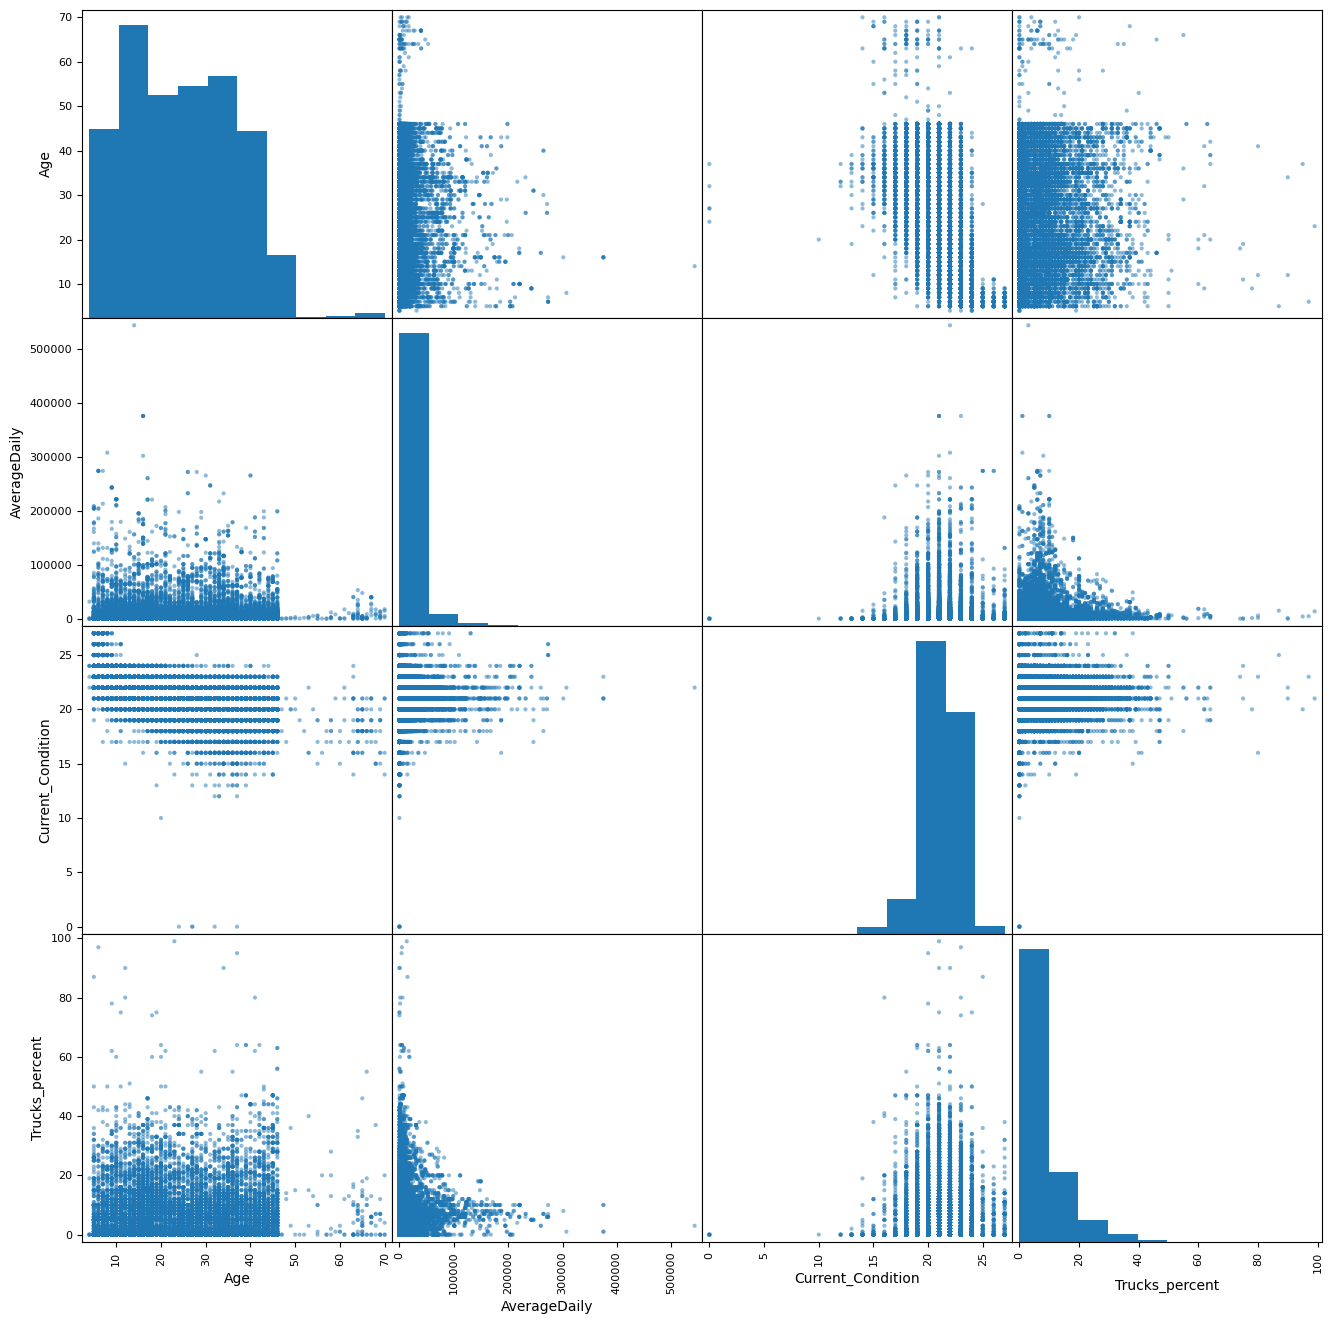

In [31]:
# scatter matrix to visualize the relationships between variables in df.
# Age, AverageDaily, Materials, Designs, Current_Condition, and Trucks_percent.
# This matrix provides insights into potential correlations and patterns among these variables.

df0 = df2[['Age', 'AverageDaily', 'Material', 'Design', 'Current_Condition', 'Trucks_percent']]
pd.plotting.scatter_matrix(df0, figsize=(16, 16))

In [32]:
# Summary of the distribution of each numerical column.
#just contious variavles

df3 = df2[['Age','AverageDaily','Trucks_percent','Current_Condition']]
df3.describe()


,Age,AverageDaily,Trucks_percent,Current_Condition
count,20035.000000,20035.000000,20035.000000,20035.000000
mean,24.613227,11905.588121,6.274420,21.089044
std,11.656192,25707.388222,8.594254,1.771165
min,4.000000,0.000000,0.000000,0.000000
25%,15.000000,190.000000,0.000000,20.000000
50%,24.000000,2980.000000,3.000000,21.000000
75%,34.000000,12172.000000,10.000000,22.000000
max,70.000000,543000.000000,99.000000,27.000000


#### 2.2.2 Relationship Between 'Age' and 'Current Condition'


We observe a generally scattered pattern. Suprisingly there seems to be a mild tendency for the older bridges to have a current condition ratings on par with younger. However, this relationship does not appear to be very strong. Outliers appear to be from ages 20 - 40 years. Further statistical testing may be required to confirm the significance of this relationship.

<Axes: title={'center': 'Scatter Plot of Age vs. Current Condition'}, xlabel='Age', ylabel='Current_Condition'>

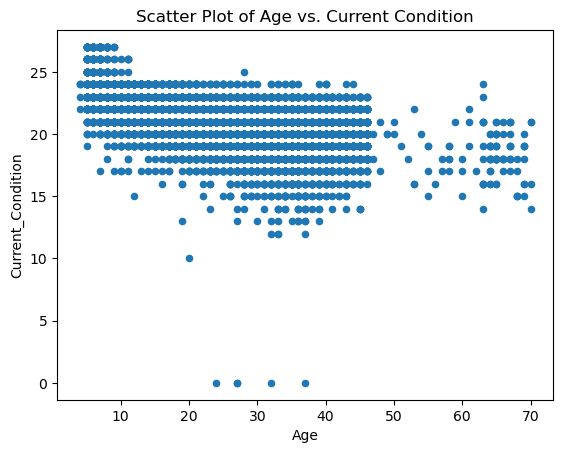

In [33]:
#age vs current
df3.plot(kind='scatter',  x='Age', y='Current_Condition',title='Scatter Plot of Age vs. Current Condition')

#### 2.2.3 Relationship Between 'AverageDaily' and 'Current Condition'


The scatter plot indicates a dispersed distribution with no clear linear trend. It seems to have a negative correlation between the two variables as average daily count increases current condition decrease, the high proportion of data near the top left may show this. This suggests that the average daily use alone may have an inverse relationship with current bridge conditions. 

<Axes: title={'center': 'Scatter Plot of Average Daily vs. Current Condition'}, xlabel='AverageDaily', ylabel='Current_Condition'>

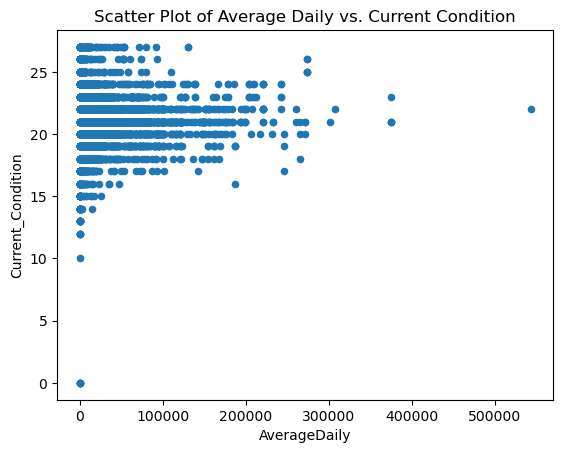

In [34]:
#daily vs current
df3.plot(kind='scatter',  x='AverageDaily', y='Current_Condition',title='Scatter Plot of Average Daily vs. Current Condition')

#### 2.2.4 Relationship Between 'Trucks_percent' and 'Current Condition'


The scatter plot shows a wide dispersion of data points,  it's challenging to identify a direct linear relationship between trucks' percentage and current condition. Regression analysis will be done to quantify this relationship accurately in part 3.

<Axes: title={'center': 'Scatter Plot of Trucks Percent vs. Current Condition'}, xlabel='Trucks_percent', ylabel='Current_Condition'>

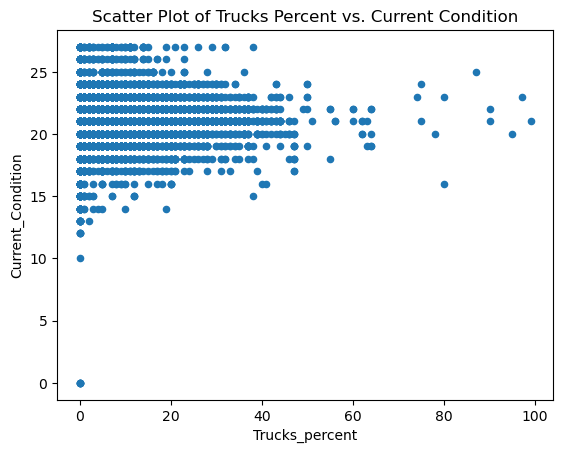

In [35]:
#trucks vs current
df3.plot(kind='scatter',  x='Trucks_percent', y='Current_Condition', title='Scatter Plot of Trucks Percent vs. Current Condition')

#### 2.2.5 Distribution Analysis of Continuous Variables

This section includes histograms for the four continuous variables: 'Age', 'Average Daily', 'Trucks Percent' and 'Current Condition'. These histograms help us understand the distributions and variations within these variables. 'Average Daily' & 'Trucks Percent' seem to have a negative distribution, whilst 'Age' and 'Current Condition' seem to have more variability within the distributions.
 

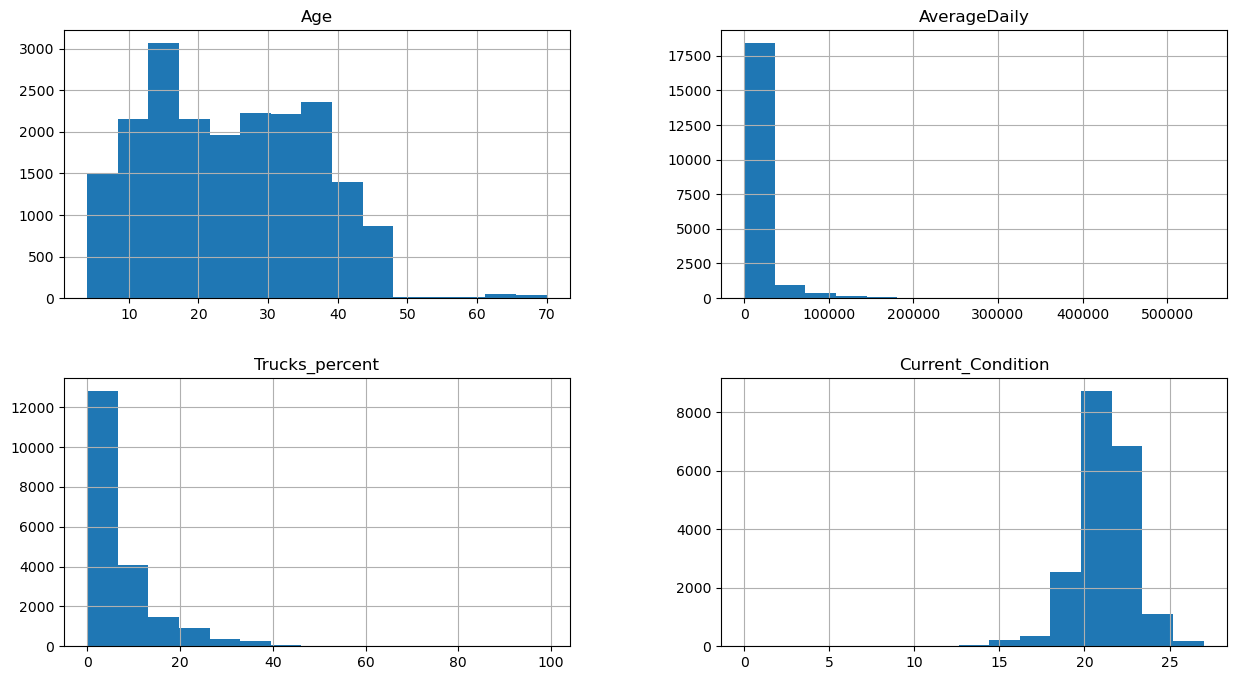

In [36]:
#histogram of all 4 continous variables
hist = df3.hist(bins=15, figsize=(15,8))

In [37]:
# correlation
df3.corr()

,Age,AverageDaily,Trucks_percent,Current_Condition
Age,1.000000,-0.021727,0.015116,-0.534150
AverageDaily,-0.021727,1.000000,0.081637,0.044996
Trucks_percent,0.015116,0.081637,1.000000,0.082384
Current_Condition,-0.534150,0.044996,0.082384,1.000000


#### 2.2.6 Variable Correlations with Heatmap

Here a heatmap is used to showcase the correlations between all continuous variables. The heatmap provides a visual summary for how variables are interconnected.

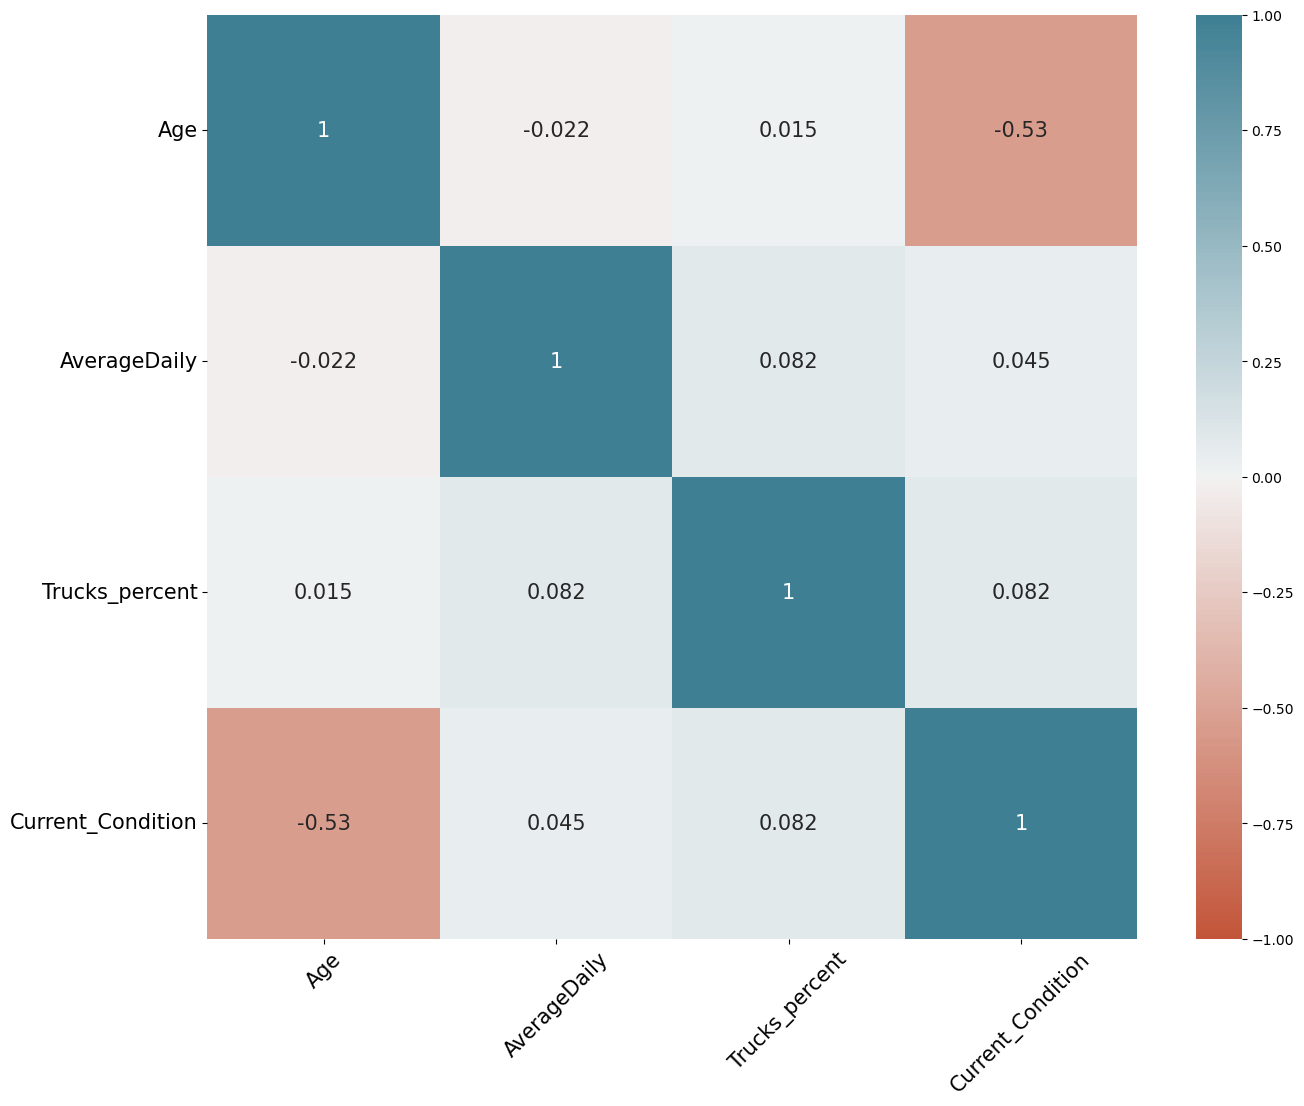

In [38]:
fig,ax = plt.subplots(1,1, figsize=(15,12))
sns.heatmap(df3.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), 
           annot=True, ax=ax, annot_kws={"size": 15})
_y = plt.yticks(rotation=0, fontsize=15)
_x = plt.xticks(rotation=45, fontsize=15)

#### 2.2.7 Categorical Variable Analysis: Design and Materials



In this  section, a box plot is used to explore the categorical variables 'Design' and 'Materials.' The box plot allows the influence of the categorical variables on bridge conditions to be assesed.



In [39]:
#new df for categorical
df4= df2[['Material','Design','Current_Condition']]
df4

,Material,Design,Current_Condition
Structure_id,,,
000021521-00101,Concrete,Slab,23.0
000021521-00181,Concrete,Slab,22.0
000021521-TMP20,Concrete,Beam,24.0
000021580-00092,Concrete,Beam,23.0
000021580-00093,Concrete,Beam,24.0
...,...,...,...
DAPFORHOO000012,Concrete,Beam,21.0
DAPFORHOO000013,Concrete,Beam,21.0
DAPFORHOO000015,Concrete,Beam,21.0


Text(0, 0.5, 'Current Condition')

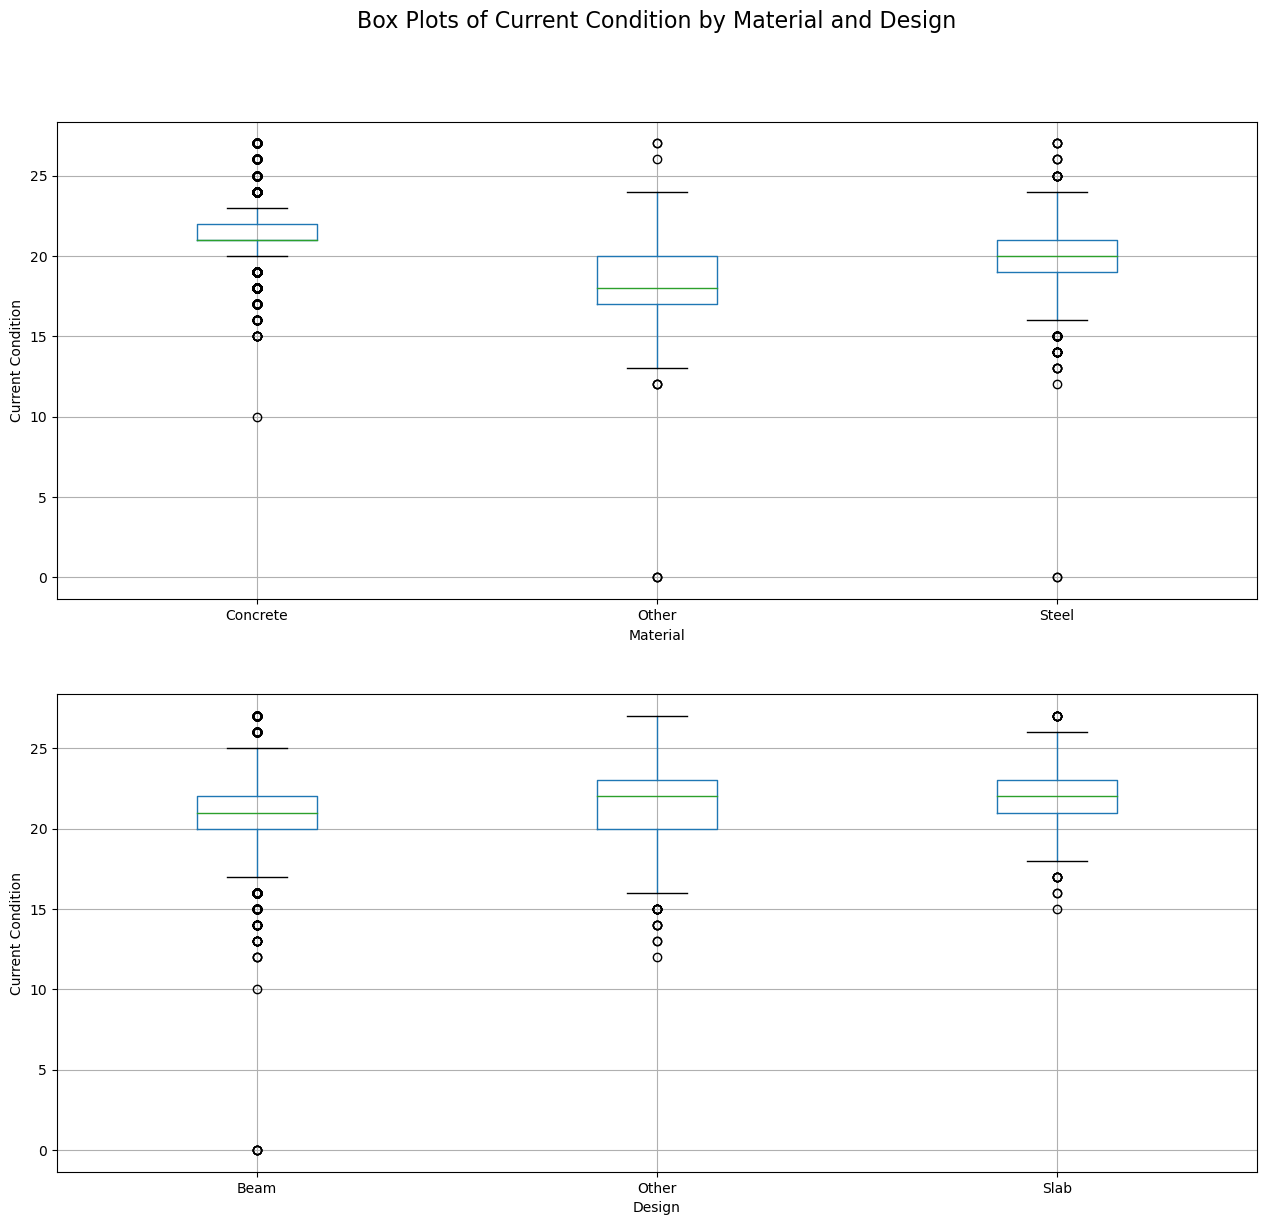

In [40]:
#box plot 

fig, (a1, a2) = plt.subplots(2,1, figsize=(15,14))

df4.boxplot(column='Current_Condition', by='Material', ax=a1)
df4.boxplot(column='Current_Condition', by='Design', ax=a2)


fig.suptitle('Box Plots of Current Condition by Material and Design' , fontsize=16)
[a.set_title('') for a in [a1, a2]]
a1.set_ylabel('Current Condition')
a2.set_ylabel('Current Condition')


#### Box Plot of Materials vs. Current Condition:

The box plot for 'Materials' vs. 'Current Condition' allows us to compare the impact of different materials on bridge conditions. The central box represents the interquartile range (IQR) and provides insights into the spread of data. The line inside the box indicates the median condition, while the dots extend to show the range of conditions, excluding potential outliers.
We can see that bridges constructed with 'Concrete' as the primary material tend to have a narrower range of conditions, with a higher median condition value signifying lessvariability in the data. In contrast, bridges with 'Steel' and 'Other' show a broader distribution and a slightly lower median condition.

By examining these box plots, valuable insights are gained into the distribution of bridge conditions across different design and material categories. This information helps to understand how these categorical variables may influence the current condition of bridges.

#### Box Plot of Design vs. Current Condition:

The box plot for 'Design' vs. 'Current Condition' shows the distribution of bridge conditions for different design types. Like the previous box plot, it shows the IQR, median, and range of conditions for each material category. Other designs seems to have the greatest variablitiy which makes sense as it has merged categories. Beam seems to have the greater potential outliers.

### Part 3: Regression Modeling



In [41]:
df0 = df2[['Age', 'AverageDaily', 'Material', 'Design', 'Current_Condition', 'Trucks_percent']]
df0
#target value = 

,Age,AverageDaily,Material,Design,Current_Condition,Trucks_percent
Structure_id,,,,,,
000021521-00101,18,1,Concrete,Slab,23.0,0.0
000021521-00181,18,1,Concrete,Slab,22.0,0.0
000021521-TMP20,11,100,Concrete,Beam,24.0,0.0
000021580-00092,19,150,Concrete,Beam,23.0,4.0
000021580-00093,18,150,Concrete,Beam,24.0,4.0
...,...,...,...,...,...,...
DAPFORHOO000012,29,300,Concrete,Beam,21.0,40.0
DAPFORHOO000013,23,300,Concrete,Beam,21.0,40.0
DAPFORHOO000015,27,1200,Concrete,Beam,21.0,25.0


In [42]:
# fig, (a1,a2,a3) = plt.subplots(3, 1, figsize=(6,14))
# df0.plot(kind='scatter',  x='Age', y='Current_Condition', ax=a1)
# df0.plot(kind='scatter',  x='Trucks_percent', y='Current_Condition', ax=a2)
# df0.plot(kind='scatter',  x='AverageDaily', y='Current_Condition', ax=a3)

#### Section 3.1.1 Fitting the Regression Line


In this section, 'fit' is used to fit the linear regression.

To fit a linear regression, we need to get the predictor data in the right format. For each bridge the regression fit routine expects to have an array with one element for each. Containing a list of predictor values this can be done with `column_stack`.

In [43]:
y = df0.Current_Condition # thisis the target variable; we assue just one though more are possible
X = np.column_stack((df0.Age, df0.AverageDaily, df0.Trucks_percent))
X[0:5]

array([[ 18.,   1.,   0.],
       [ 18.,   1.,   0.],
       [ 11., 100.,   0.],
       [ 19., 150.,   4.],
       [ 18., 150.,   4.]])

#### Section 3.1.2 Coefficient of Determination

This section interprets the R-squared (R2) coefficient of determination. R2 measures the proportion of variance in the target variable that is explained by the predictor variables. The R2 coefficient of determination is 0.294 meaning that the model only explains 29.4% of the variability in the data which suggests there could be other factors influencing the current condition that has not been accounted for.

In [44]:
reg = LinearRegression().fit(X, y)
print('The R2 coefficient of determination is %4.3f' % reg.score(X, y))
print('The intercept is %4.1f' % reg.intercept_)

The R2 coefficient of determination is 0.294
The intercept is 23.0


#### Section 3.1.3 Regression Coefficients

This section involves interpreting the coefficients of the regression model. It quantifies the relationship between the dependant and independant variable.

For Age it is -0.08 meaning as age of bridge increase the current condition tends to decrease by -0.08 indicating a negative correlation

For AverageDaily it seems to have 0.00 meaning it has no statistically significant value on current condition and is not a useful predictior variable

For Trucks_percent has a value of 0.02 showing a positive relationship between the 2 variables as Trucks_percent increases so does Current condition of bridge. 



In [45]:
beta_Age, beta_AverageDaily, beta_Trucks_percent = reg.coef_
print('Estimated regression coefficient for Age is %4.2f' % beta_Age)
print('Estimated regression coefficient for AverageDaily is %4.2f' % beta_AverageDaily)
print('Estimated regression coefficient for Trucks_percent is %4.2f' % beta_Trucks_percent)

Estimated regression coefficient for Age is -0.08
Estimated regression coefficient for AverageDaily is 0.00
Estimated regression coefficient for Trucks_percent is 0.02


Here the values are standardised to make it easier to compare the predictors

For Age it is -0.95 meaning as age of bridge increase the current condition tends to decrease by -0.08 indicating a negative correlation

For AverageDaily it seems to have 0.05 showing a positive relationship between the 2 variables as AverageDaily increases so does Current condition of bridge. 

For Trucks_percent has a value of 0.16 showing a positive relationship between the 2 variables as Trucks_percent increases so does Current condition of bridge. 


In [46]:
# standardised

Z = StandardScaler().fit_transform(X)

reg1 = LinearRegression().fit(Z, y)
print('The R2 coefficient of determination is %4.3f' % reg.score(X, y))
print('The intercept is %4.1f' % reg1.intercept_)
beta_Age2, beta_AverageDaily2 , beta_Trucks_percent2  = reg1.coef_
print('Estimated regression coefficient for standardised Age is %4.2f' % beta_Age2)
print('Estimated regression coefficient for standardised AverageDaily is %4.2f' % beta_AverageDaily2)
print('Estimated regression coefficient for standardised Trucks_percent is %4.2f' % beta_Trucks_percent2)


The R2 coefficient of determination is 0.294
The intercept is 21.1
Estimated regression coefficient for standardised Age is -0.95
Estimated regression coefficient for standardised AverageDaily is 0.05
Estimated regression coefficient for standardised Trucks_percent is 0.16


#### Section 3.1.4 Comparing the Coefficients

In [47]:
age_range = df0.Age.quantile(0.9) - df0.Age.quantile(0.1)
AverageDaily_range = df0.AverageDaily.quantile(0.9) - df0.AverageDaily.quantile(0.1)
Trucks_percent_range = df0.Trucks_percent.quantile(0.9) - df0.Trucks_percent.quantile(0.1)
Current_Condition_range = df0.Current_Condition.quantile(0.9) - df0.Current_Condition.quantile(0.1)

print('Age range (10th to 90th centile) is %3.1f' % age_range, 'years')
print('Average Daily range (10th to 90th centile) is %3.1f' % AverageDaily_range, '')
print('Trucks percent range (10th to 90th centile) is %3.1f' % Trucks_percent_range, '%')
print('Current Condition range (10th to 90th centile) is %3.1f' % Current_Condition_range, '')


Age range (10th to 90th centile) is 31.0 years
Average Daily range (10th to 90th centile) is 30040.0 
Trucks percent range (10th to 90th centile) is 17.0 %
Current Condition range (10th to 90th centile) is 4.0 


In [48]:
print ('The change in Current_Condition (as a percent of its range) given by the Age coefficient (over its range) is %4.1f percent'
       % (100 * (beta_Age * age_range) / Current_Condition_range))

print ('The change in Current_Condition (as a percent of its range) given by the AverageDaily coefficient (over its range) is %4.1f percent'
       % (100 * (beta_AverageDaily * AverageDaily_range) / Current_Condition_range))

print ('The change in Current_Condition (as a percent of its range) given by the Trucks_percent coefficient (over its range) is %4.1f percent'
       % (100 * (beta_Trucks_percent * Trucks_percent_range) / Current_Condition_range))


The change in Current_Condition (as a percent of its range) given by the Age coefficient (over its range) is -63.0 percent
The change in Current_Condition (as a percent of its range) given by the AverageDaily coefficient (over its range) is  1.4 percent
The change in Current_Condition (as a percent of its range) given by the Trucks_percent coefficient (over its range) is  7.7 percent


#### Section 3.1.5 Categorical variables

In this section, I will explore the influence of the categorical predictor variables, specifically 'Design' and 'Material.' I've converted these variables into a format suitable for regression analysis. I will analyze the impact of different design and material categories on the current bridge conditions. 

In [49]:
Designs_d = pd.get_dummies(df0['Design']) #, drop_first=True)
Designs_d

,Beam,Other,Slab
Structure_id,,,
000021521-00101,0,0,1
000021521-00181,0,0,1
000021521-TMP20,1,0,0
000021580-00092,1,0,0
000021580-00093,1,0,0
...,...,...,...
DAPFORHOO000012,1,0,0
DAPFORHOO000013,1,0,0
DAPFORHOO000015,1,0,0


In [50]:
Materials_d = pd.get_dummies(df0['Material']) #, drop_first=True)
Materials_d

,Concrete,Other,Steel
Structure_id,,,
000021521-00101,1,0,0
000021521-00181,1,0,0
000021521-TMP20,1,0,0
000021580-00092,1,0,0
000021580-00093,1,0,0
...,...,...,...
DAPFORHOO000012,1,0,0
DAPFORHOO000013,1,0,0
DAPFORHOO000015,1,0,0


R2 is a measure of how well the model fits the data

In [51]:
X2 = np.column_stack((df0.Age,df0.AverageDaily, df0.AverageDaily, df0.Trucks_percent,Designs_d.Slab, Designs_d.Other, Materials_d.Other, Materials_d.Steel))
reg2 = LinearRegression().fit(X2, y)
print('The R2 coefficient of determination is %4.3f' % reg2.score(X2, y))
print('The intercept is %4.1f' % reg2.intercept_)
print('The regression coefficients are:', reg2.coef_)

The R2 coefficient of determination is 0.464
The intercept is 23.4
The regression coefficients are: [-7.79586454e-02 -3.63880770e-07 -3.63880603e-07 -4.13684213e-03
  7.87043031e-02  1.58063258e-01 -2.76640051e+00 -1.78596073e+00]


In the context of a linear regression model predicting the 'Current_Condition' of bridges, the results indicate that approximately 46.4% of the variance in bridge conditions can be explained by the selected predictor variables. Bridge age has a negative impact on current condition, with each year contributing to a decrease of about 0.078 units. Average daily traffic and truck percentage have minimal impact. Among the categorical variables, bridges with 'Slab' and 'Other' designs tend to have better conditions, with increases of 0.079 and 0.158 units, respectively, compared to the reference design category. On the other hand, bridges made of 'Other' and 'Steel' materials show worse conditions, with decreases of approximately 2.766 and 1.786 units, respectively, relative to the reference material category. The intercept of 23.4 represents the expected condition of a bridge with zero values for all predictor variables.

In [52]:

age_range = df0.Age.quantile(0.9) - df0.Age.quantile(0.1)
AverageDaily_range = df0.AverageDaily.quantile(0.9) - df0.AverageDaily.quantile(0.1)
Trucks_percent_range = df0.Trucks_percent.quantile(0.9) - df0.Trucks_percent.quantile(0.1)
# Current_Condition_range = df0.Current_Condition.quantile(0.9) - df0.Current_Condition.quantile(0.1)

print('Age range (10th to 90th centile) is %3.1f' % age_range, 'years')
print('Average Daily range (10th to 90th centile) is %3.1f' % AverageDaily_range, '')
print('Trucks percent range (10th to 90th centile) is %3.1f' % Trucks_percent_range, '%')
# print('Current Condition range (10th to 90th centile) is %3.1f' % Current_Condition_range, '')


Age range (10th to 90th centile) is 31.0 years
Average Daily range (10th to 90th centile) is 30040.0 
Trucks percent range (10th to 90th centile) is 17.0 %


#### Section 3.1.6 Getting the error

In this section, we calculate the residuals (prediction errors) by subtracting the actual current condition values from the predicted values. A histogram is made from these residuals, helping to visualise their distribution and assess model performance.

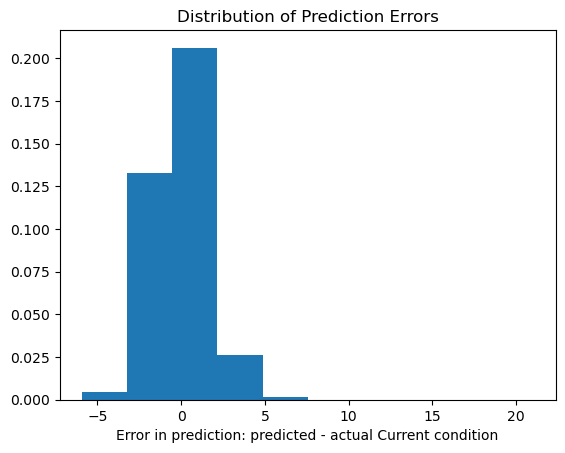

In [53]:
y_hat = reg.predict(X)

fig, a1 = plt.subplots(1, 1)
residuals = y_hat - y
a1.hist(residuals, bins=10, density=True)
a1.set_title('Distribution of Prediction Errors')

_ = a1.set_xlabel('Error in prediction: predicted - actual Current condition')

The Root Mean Squared Error (RMSE) is one of the two main performance indicators for a regression model. It measures the average difference between values predicted by a model and the actual values. A RMSE of 1.49 means on average this models predictions differs from obsered conditions by approximately 1.49 units

In [54]:
print('Root of the mean squared error: %.2f'% mean_squared_error(y, y_hat, squared=False))

Root of the mean squared error: 1.49


Text(0, 0.5, 'Actual Value')

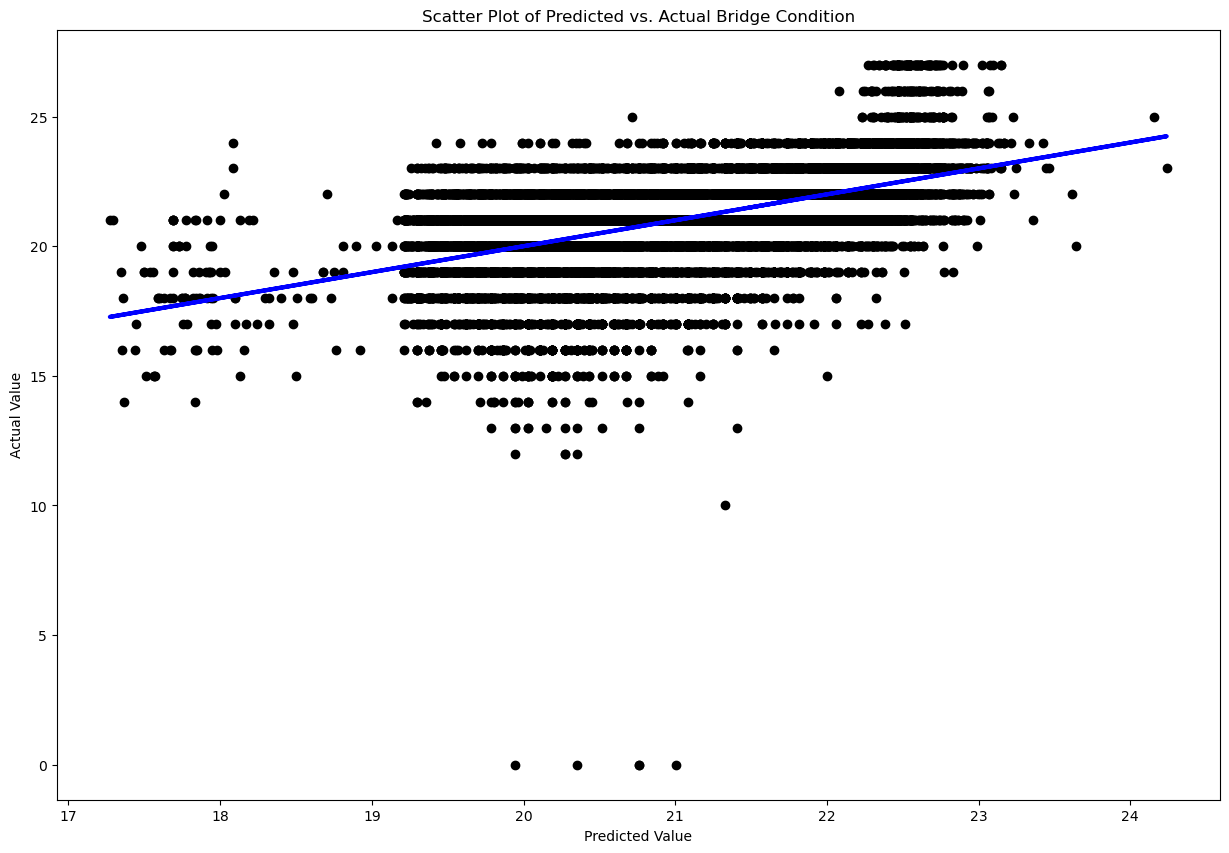

In [55]:
fig, a = plt.subplots(1,1,figsize=(15,10))
a.scatter(y_hat, y,  color='black')
a.plot(y_hat, y_hat, color='blue', linewidth=3)


a.set_title('Scatter Plot of Predicted vs. Actual Bridge Condition')

a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')

The scatter plot compares predicted bridge condition values (y_hat) with actual condition values (y). Ideally, points should align along the blue diagonal line, representing perfect predictions. Deviations indicate prediction errors. Most points cluster near the line, indicating reasonably accurate predictions. Discrepancies suggest areas for model improvement.

### Summary

In this analysis, I explored the relationships between key predictor variables – 'Age,' 'AverageDaily,' 'Trucks_percent,' 'Materials,' and 'Designs' – and the bridge condition. During the data preparation phase, I derived a meaningful 'Age' variable from 'Year' and simplified the 'Materials' and 'Designs' categories. In the exploratory analysis, I used scatter matrices and individual scatter plots to gain insights. I found that 'Age' exhibits a moderately strong relationship with 'Current_Condition,' which aligns with my initial hypothesis. In the regression modeling, which featured a linear regression model, I obtained an R2 coefficient of determination of 0.464 from the regression model. This suggests that the predictor variables collectively explain approximately 46.4% of the variation in bridge condition.

As for the influence of variables, 'Age' stands out as the primary determinant of bridge condition, with a significant negative coefficient in the regression model, implying that older bridges tend to have lower ratings. This finding aligns with domain knowledge, suggesting that 'Age' is a pivotal factor in bridge condition assessment. However, it's important to consider the practical implications, as the model encompasses other variables such as 'Materials' and 'Designs,' which contribute to the overall predictive power. Further investigations and refined models could provide better insights. In summary, the analysis indicates that 'Age' plays a pivotal role in predicting bridge condition, with a substantial influence. From the regression model, whilst other variables contribute 'Age' remains the most influential predictor. This information can guide decisions for bridge maintenance and improvement.